In [1]:
from einops import rearrange, repeat
from einops.layers.torch import Rearrange

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = Image.open('../../DL/data/kongming.jpg')

# 展示图像
image.show()


Error: no "view" mailcap rules found for type "image/png"
Unable to connect to VS Code server: Error in request.
Error: connect ENOENT /run/user/1000/vscode-ipc-83db096c-75e7-4ab7-9950-af93154b5e57.sock
    at PipeConnectWrap.afterConnect [as oncomplete] (node:net:1494:16) {
  errno: -2,
  code: 'ENOENT',
  syscall: 'connect',
  address: '/run/user/1000/vscode-ipc-83db096c-75e7-4ab7-9950-af93154b5e57.sock'
}
Unable to connect to VS Code server: Error in request.
Error: connect ENOENT /run/user/1000/vscode-ipc-83db096c-75e7-4ab7-9950-af93154b5e57.sock
    at PipeConnectWrap.afterConnect [as oncomplete] (node:net:1494:16) {
  errno: -2,
  code: 'ENOENT',
  syscall: 'connect',
  address: '/run/user/1000/vscode-ipc-83db096c-75e7-4ab7-9950-af93154b5e57.sock'
}
xdg-open: no method available for opening '/tmp/tmp_bnd9r5o.PNG'


图像数组形状: (244, 270)


/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/

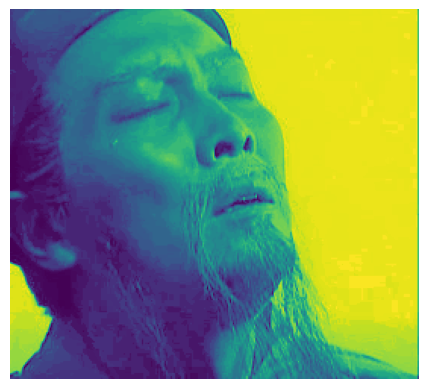

In [4]:
# 转换为数据数组
image_array = np.array(image)

# 打印数组形状
print('图像数组形状:', image_array.shape)

# 可选：使用Matplotlib展示图像数组
plt.imshow(image_array)
plt.axis('off')
plt.show()

In [6]:
image_array.shape

(244, 270)

In [19]:
rearrange(image_array, 'h w -> w h').shape

(270, 244)

In [7]:
import torch
i_tensor = torch.tensor(image_array)

In [8]:
i_tensor.shape

torch.Size([244, 270])

In [9]:
import torchvision.transforms as transforms

In [10]:
# 定义中心裁剪的尺寸
crop_size = 240

# 创建CenterCrop变换对象
center_crop = transforms.CenterCrop(crop_size)

# 进行中心裁剪
cropped_image = center_crop(i_tensor)


In [11]:
cropped_image.shape

torch.Size([240, 240])

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/

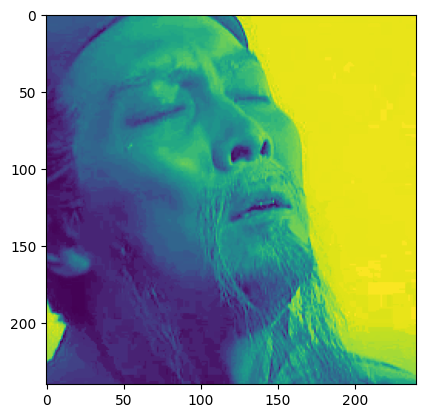

In [12]:
plt.imshow(cropped_image)

In [13]:
cropped_image

tensor([[ 84,  73,  73,  ..., 245, 245, 245],
        [ 71,  84,  73,  ..., 244, 244, 244],
        [ 71,  71,  71,  ..., 245, 245, 245],
        ...,
        [ 38,  50,  50,  ..., 164, 164, 181],
        [ 42,  50,  50,  ..., 164, 164, 164],
        [ 42,  42,  38,  ..., 152, 152, 152]], dtype=torch.uint8)

In [28]:
o_tensor = rearrange(cropped_image, '(p1 n1) (p2 n2) -> p1 p2 (n1 n2)', p1=80, p2=80)

In [34]:
a_tensor = rearrange(o_tensor, 'h w n -> n h w')

In [38]:
a_tensor[1].shape

torch.Size([80, 80])

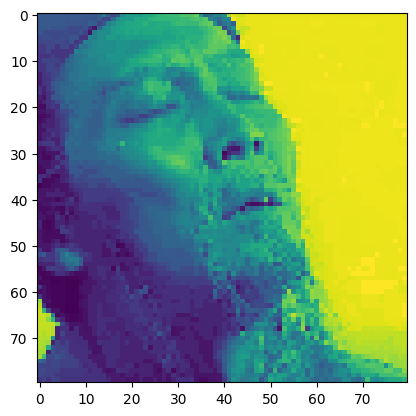

In [41]:
plt.imshow(a_tensor[3])

In [42]:
from PIL import Image

# 打开图像
# image = Image.open("your_image.jpg")  # 替换为你的图像文件路径#

# 获取图像的宽度和高度
width, height = image.size

# 定义每块的大小
block_size = 80

# 切割图像
blocks = []
for i in range(3):
    for j in range(3):
        # 计算每块的左上角和右下角坐标
        left = j * block_size
        upper = i * block_size
        right = left + block_size
        lower = upper + block_size

        # 切割图像并添加到列表中
        block = image.crop((left, upper, right, lower))
        blocks.append(block)

# 显示切割后的图像块
for i, block in enumerate(blocks):
    block.show()  # 显示图像块
    block.save(f"block_{i+1}.jpg")  # 保存图像块，可选步骤


Error: no "view" mailcap rules found for type "image/png"
Unable to connect to VS Code server: Error in request.
Error: connect ENOENT /run/user/1000/vscode-ipc-83db096c-75e7-4ab7-9950-af93154b5e57.sock
    at PipeConnectWrap.afterConnect [as oncomplete] (node:net:1494:16) {
  errno: -2,
  code: 'ENOENT',
  syscall: 'connect',
  address: '/run/user/1000/vscode-ipc-83db096c-75e7-4ab7-9950-af93154b5e57.sock'
}
Unable to connect to VS Code server: Error in request.
Error: connect ENOENT /run/user/1000/vscode-ipc-83db096c-75e7-4ab7-9950-af93154b5e57.sock
    at PipeConnectWrap.afterConnect [as oncomplete] (node:net:1494:16) {
  errno: -2,
  code: 'ENOENT',
  syscall: 'connect',
  address: '/run/user/1000/vscode-ipc-83db096c-75e7-4ab7-9950-af93154b5e57.sock'
}
xdg-open: no method available for opening '/tmp/tmpf33izjkn.PNG'


OSError: cannot write mode P as JPEG

In [43]:
image = image.convert('RGB')

In [45]:
np.array(image).shape

(244, 270, 3)

In [46]:
from PIL import Image

# 打开图像
# image = Image.open('image.jpg')

# 获取图像的宽度和高度
width, height = image.size

# 计算每个块的宽度和高度
block_width = width // 3
block_height = height // 3

# 切割图像并保存每个块
for i in range(3):
    for j in range(3):
        # 计算当前块的左上角和右下角坐标
        left = i * block_width
        upper = j * block_height
        right = left + block_width
        lower = upper + block_height

        # 切割图像
        block = image.crop((left, upper, right, lower))

        # 保存块图像
        block.save(f'block_{i}_{j}.jpg')
